In [80]:
# imports
from scipy.interpolate import PchipInterpolator
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# define important points in the scoring algorithm
points = [[0, 0], [0, 0], [3, 30], [10, 70], [30, 100], [100, 100]]
points_without_duplicates = []
[points_without_duplicates.append(x) for x in points if x not in points_without_duplicates]
points = np.array(points_without_duplicates)

interpolator = PchipInterpolator(points[:,0], points[:,1])

In [75]:
# generate 1000 values and apply the interpolation function
xpoints = np.arange(0, 100, 0.1)
ypoints = interpolator(xpoints)

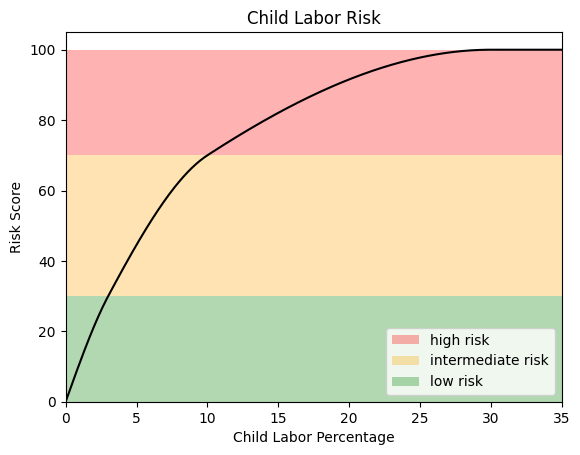

In [77]:
plt.plot(xpoints, ypoints, color="black")
#plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.title("Child Labor Risk")
plt.xlabel("Child Labor Percentage")
plt.ylabel("Risk Score")
plt.xlim(0, 35)
plt.ylim(0)
plt.axhspan(70, 100, facecolor='r', alpha=0.3, label="high risk")
plt.axhspan(30, 70, facecolor='orange', alpha=0.3, label="intermediate risk")
plt.axhspan(0, 30, facecolor='g', alpha=0.3, label="low risk")
plt.legend(loc= "lower right")
plt.show()